In [59]:
# Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
# Figure out if any preprocessing such as scaling would help here
# Draw elbow plot and from that figure out optimal value of k

In [62]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [63]:
data=load_iris()

In [66]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [74]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [77]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [78]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [79]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [82]:
df=df.drop(df[['sepal length (cm)','sepal width (cm)']],axis=1)

In [83]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [84]:
import matplotlib.pyplot as plt

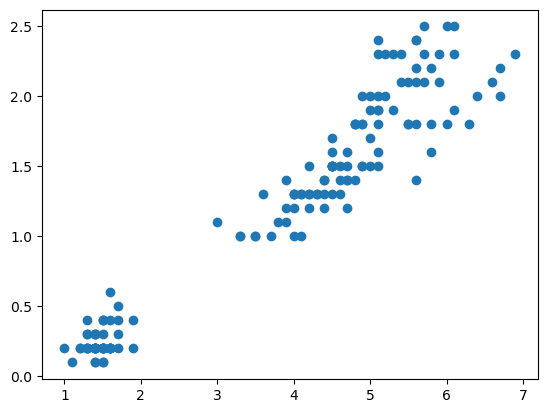

In [85]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [92]:
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df[['petal length (cm)']]=scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df[['petal width (cm)']]=scaler.transform(df[['petal width (cm)']])

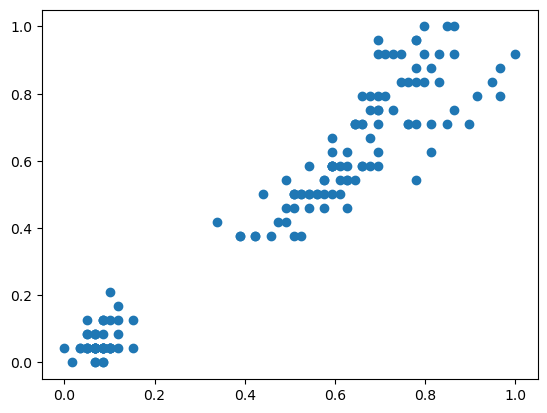

In [93]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [94]:
sse=[]
k_rng=range(1,10)
for k in k_rng :
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [95]:
sse

[28.368353219727194,
 5.176463590044369,
 1.7018746881920963,
 1.1588792731667128,
 0.8535683225340072,
 0.6800800986587509,
 0.5656776810037091,
 0.48580845539143697,
 0.41326677825124736]

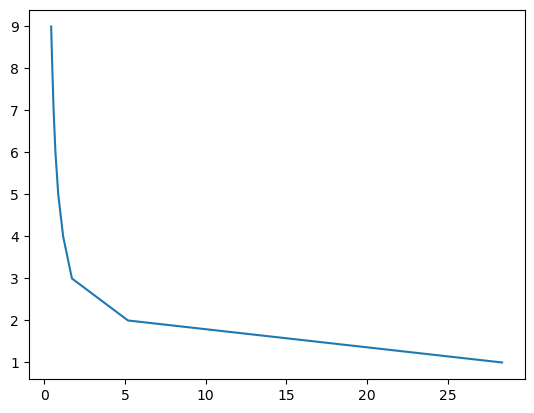

In [96]:

plt.plot(sse,k_rng)

In [98]:
km=KMeans(n_clusters=5)
prediction=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

C:\Users\samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [99]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 4, 3, 0, 0, 3, 0, 0, 4, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 4, 2, 2, 0, 4, 4, 2,
       4, 4, 2, 4, 2, 2, 4, 2, 2, 0, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 0, 0, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4])

In [101]:
df['cluster']=prediction

In [102]:
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,4
147,0.711864,0.791667,4
148,0.745763,0.916667,2


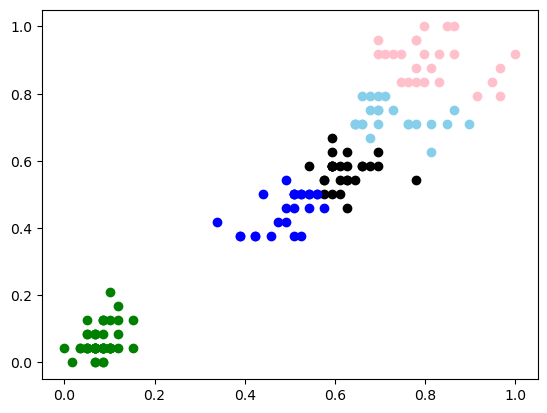

In [103]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='black')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='pink')
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color='blue')
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'],color='skyblue')

In [104]:
km.cluster_centers_

array([[0.62209667, 0.56635802],
       [0.07830508, 0.06083333],
       [0.81762712, 0.89666667],
       [0.49016949, 0.45      ],
       [0.7266028 , 0.72644928]])

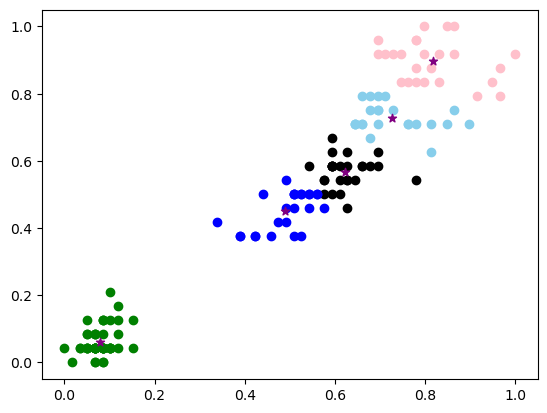

In [107]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='black')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='pink')
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color='blue')
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'],color='skyblue')

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],color='purple',marker='*'
    
        )